<h1 style='background:brown; border:0; color:white'><center>MALADIE CARDIAQUE : ANALYSE ET PRÉDICTION</center><h1>

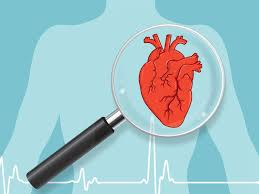

Le terme "maladie cardiaque" est souvent utilisé de manière interchangeable avec le terme "maladie cardiovasculaire". La maladie cardiovasculaire fait généralement référence à des conditions qui impliquent des vaisseaux sanguins rétrécis ou bloqués pouvant entraîner une crise cardiaque, des douleurs thoraciques (angine de poitrine) ou un AVC. D'autres affections cardiaques, telles que celles qui affectent le muscle cardiaque, les valves ou le rythme cardiaque, sont également considérées comme des formes de maladie cardiaque.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style(style='darkgrid')
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree 
from sklearn import svm
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [3]:
heart = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
len(heart)

303

In [59]:
true = sum(heart['target'] == 1)

In [60]:
true

165

**Compréhension de toutes les colonnes**
- **age**,
- **sex**, 0 = femme, 1 = homme
- **cp**, douleur thoracique, 0 = angine typique, 1 = angine atypique, 2 = douleur non angineuse, 3 = asymptomatique
- **trestbps**, tension artérielle au repos (en mm Hg)
- **chol**, cholestérol sérique en mg/dl
- **fbs**, glycémie à jeun 0 = >=120 mg/dl , 1= <120 mg/dl 
- **restecg**, résultats électrocardiographiques au repos 1 = normal, 2 = présentant une anomalie de l'onde ST-T, 3 = montrant une hypertrophie ventriculaire gauche probable ou définitive
- **thalach**,  fréquence cardiaque maximale atteinte
- **exang**, angine induite par l'exercice, 0 = non, 1 = oui
- **oldpeak**, dépression de ST induite par l'exercice par rapport au repos 1 = ascendante, 2 = plate, 3 = descendante
- **slope**, la pente du segment ST de l'exercice maximal, 1 = ascendante, 2 = plate, 3 = descendante
- **ca**, nombre de vaisseaux principaux (0-3) colorés par fluoroscopie
- **thal**, ceci est l'abréviation de la scintigraphie cardiaque au thallium, 3 = normal (pas de zones froides), 6 = défaut fixe (zones froides pendant le repos et l'exercice), 7 = défaut réversible (lorsque des zones froides n'apparaissent que pendant l'exercice)
- **target**, diagnostic de maladie cardiaque, l'attribut prédit


In [8]:
heart.shape # To see now of rows and columns

(303, 14)

In [9]:
heart.describe() # StatisticalSummary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart.isnull().sum() # Checking Missing Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

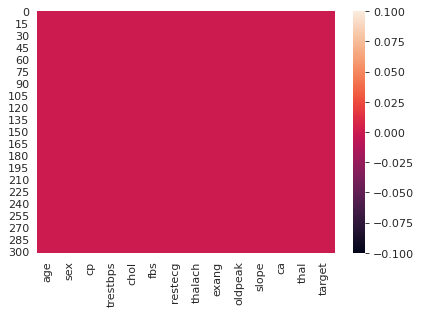

In [11]:
plt.figure(dpi=80)
sns.heatmap(heart.isnull())
plt.show()

In [12]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# **ANALYSE UNIVARIÉE**


<h2 style='color:red'><center>Effectuons une analyse univariée pour mieux comprendre nos colonnes</center><h2>


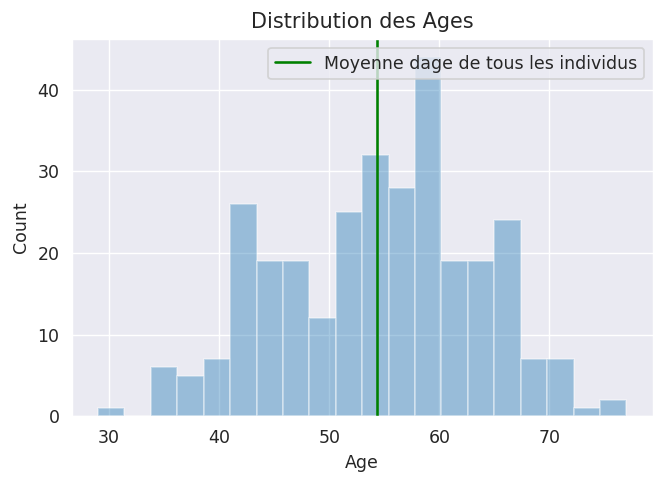

In [13]:
#Age
plt.figure(dpi=125)
sns.distplot(a=heart['age'],kde=False,bins=20)
plt.axvline(x=np.mean(heart['age']),c='green',label='Moyenne d''age de tous les individus')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution des Ages')
plt.show()

**Ainsi, il y avait 303 personnes parmi lesquelles l'âge moyen est d'environ 54 ans.**

**Maintenant, trouvons la répartition des sexes.**


Female - 96
Male - 207


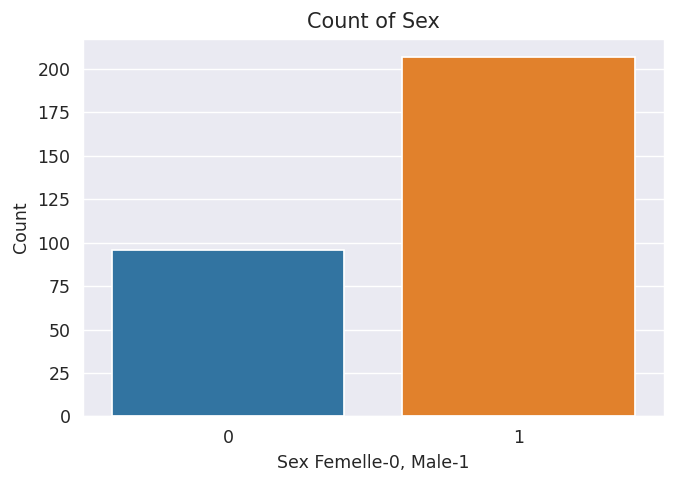

In [14]:
plt.figure(dpi=125)
male =len(heart[heart['sex'] == 1])
female = len(heart[heart['sex']== 0])
sns.countplot('sex',data = heart,)
plt.xlabel('Sex Femelle-0, Male-1')
plt.ylabel('Count')
plt.title('Count of Sex')
Male, Female =heart.sex.value_counts()
print('Female -',Female)
print('Male -',Male)
plt.show()

Angine typique - 143
Angine atypique - 50
Douleur non angineuse - 87
Asymptomatique - 23


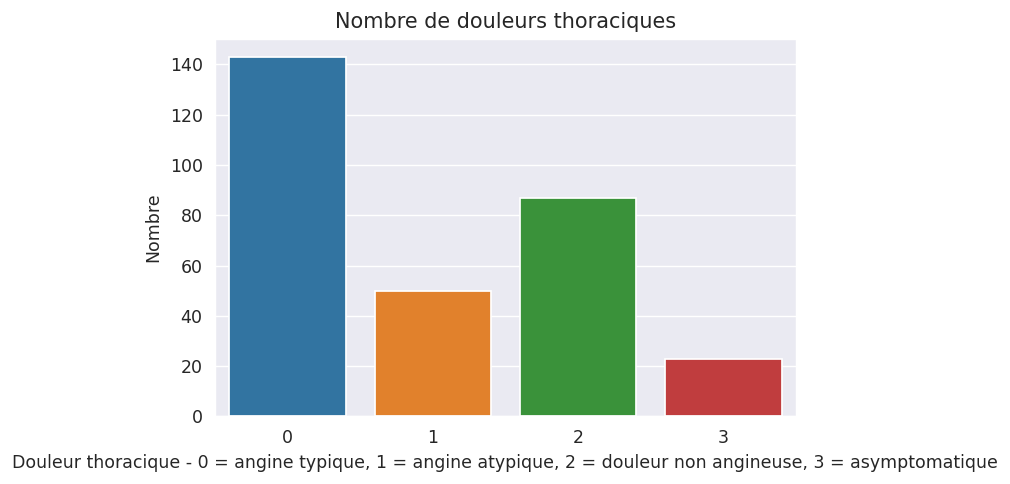

In [15]:
plt.figure(dpi=125)
sns.countplot('cp',data = heart,)
plt.xlabel("Douleur thoracique - 0 = angine typique, 1 = angine atypique, 2 = douleur non angineuse, 3 = asymptomatique")
plt.ylabel('Nombre')
plt.title('Nombre de douleurs thoraciques')
A, B, C, D = heart.cp.value_counts()

print('Angine typique -', A)
print('Angine atypique -', C)
print('Douleur non angineuse -', B)
print('Asymptomatique -', D)

plt.show()


Supérieur à 120 mg/dl - 258
Inférieur à 120 mg/dl - 45


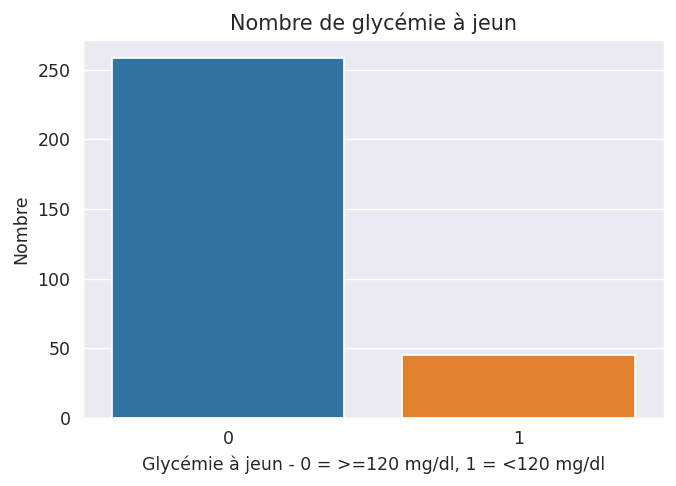

In [16]:
plt.figure(dpi=125)
sns.countplot('fbs', data=heart)
plt.xlabel('Glycémie à jeun - 0 = >=120 mg/dl, 1 = <120 mg/dl')
plt.ylabel('Nombre')
plt.title('Nombre de glycémie à jeun')
A, B = heart.fbs.value_counts()

print('Supérieur à 120 mg/dl -', A)
print('Inférieur à 120 mg/dl -', B)

plt.show()


Non - 204
Oui - 99


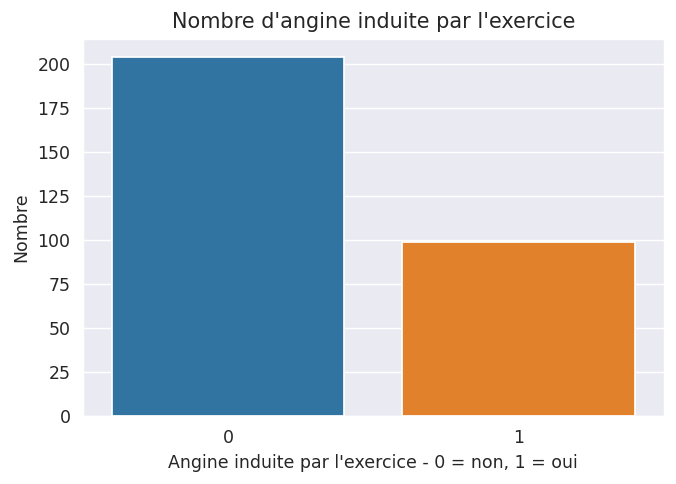

In [17]:
plt.figure(dpi=125)
sns.countplot('exang', data=heart)
plt.xlabel('Angine induite par l\'exercice - 0 = non, 1 = oui')
plt.ylabel('Nombre')
plt.title('Nombre d\'angine induite par l\'exercice')
A, B = heart.exang.value_counts()

print('Non -', A)
print('Oui -', B)

plt.show()


# **ANALYSE BIVARIEE**

<h2 style='color:red'><center>Effectuons une analyse bivariée pour mieux comprendre les relations entre les colonnes</center><h2>


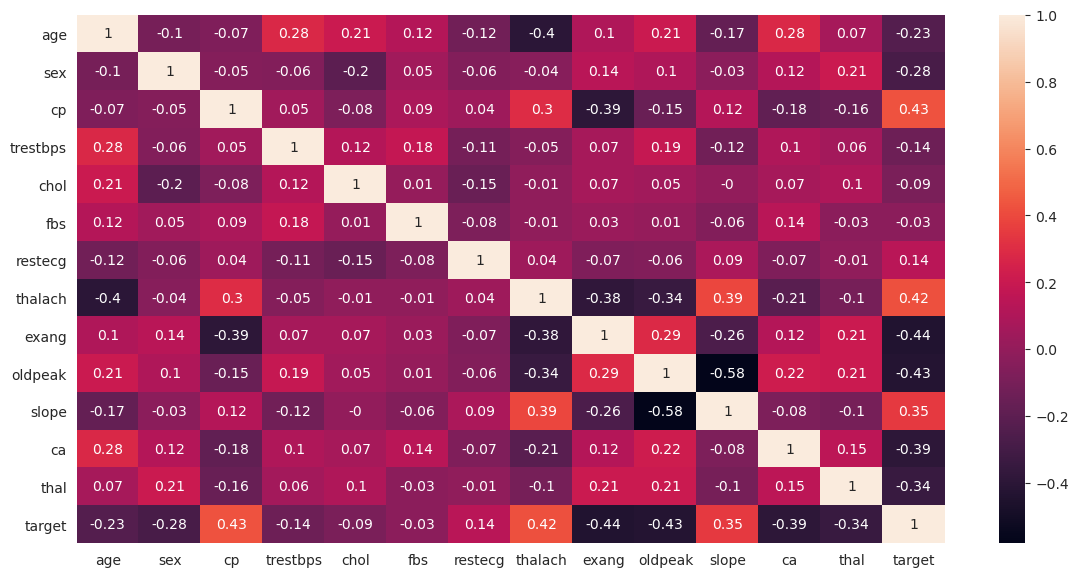

In [18]:
plt.figure(figsize=(14,7),dpi=100)
sns.heatmap(np.round(heart.corr(),2), annot = True)
plt.show()

**Analysons la relation de l'âge avec le cholestérol, la fréquence cardiaque maximale et la tension artérielle au repos.**


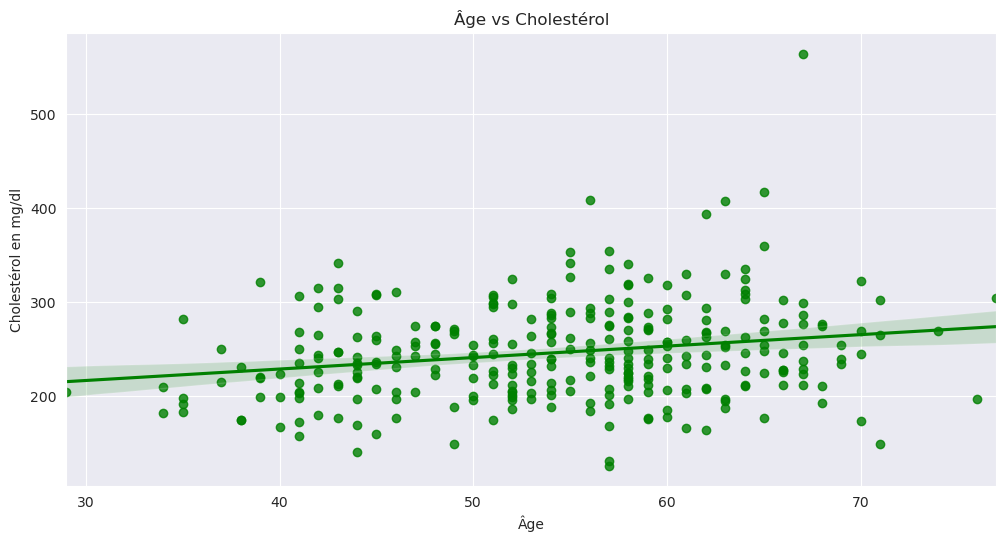

In [19]:
plt.figure(figsize=(12,6), dpi=100)
sns.regplot(x='age', y='chol', data=heart, color='green')
plt.xlabel('Âge')
plt.ylabel('Cholestérol en mg/dl')
plt.title('Âge vs Cholestérol')
plt.show()


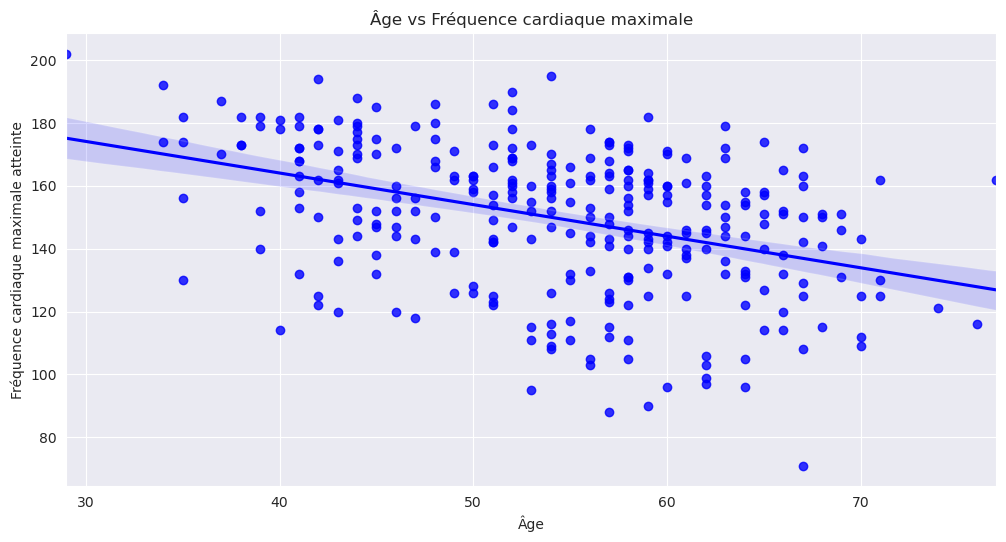

In [20]:
plt.figure(figsize=(12,6), dpi=100)
sns.regplot(x='age', y='thalach', data=heart, color='blue')
plt.xlabel('Âge')
plt.ylabel('Fréquence cardiaque maximale atteinte')
plt.title('Âge vs Fréquence cardiaque maximale')
plt.show()


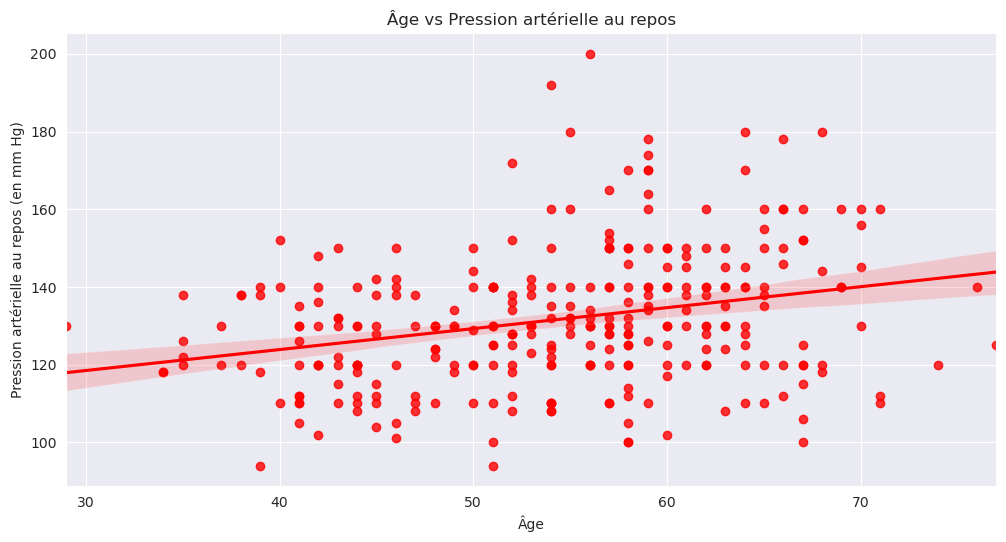

In [21]:
plt.figure(figsize=(12,6), dpi=100)
sns.regplot(x='age', y='trestbps', data=heart, color='red')
plt.xlabel('Âge')
plt.ylabel('Pression artérielle au repos (en mm Hg)')
plt.title('Âge vs Pression artérielle au repos')
plt.show()


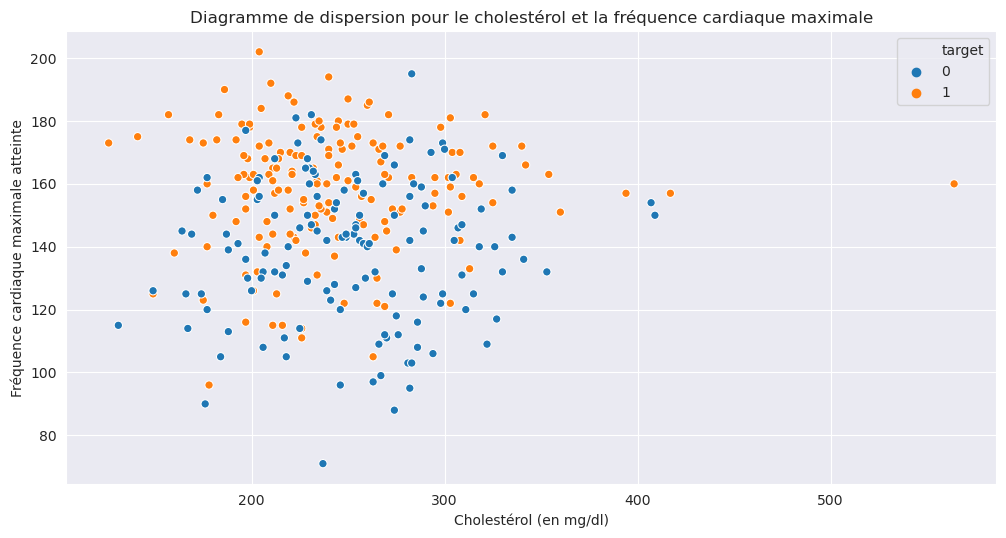

In [22]:
plt.figure(figsize=(12,6), dpi=100)
sns.scatterplot(x='chol', y='thalach', data=heart, hue='target')
plt.xlabel('Cholestérol (en mg/dl)')
plt.ylabel('Fréquence cardiaque maximale atteinte')
plt.title('Diagramme de dispersion pour le cholestérol et la fréquence cardiaque maximale')
plt.show()


**Analysons maintenant la relation du sexe avec le cholestérol, la fréquence cardiaque maximale et la tension artérielle au repos par rapport à la cible.**


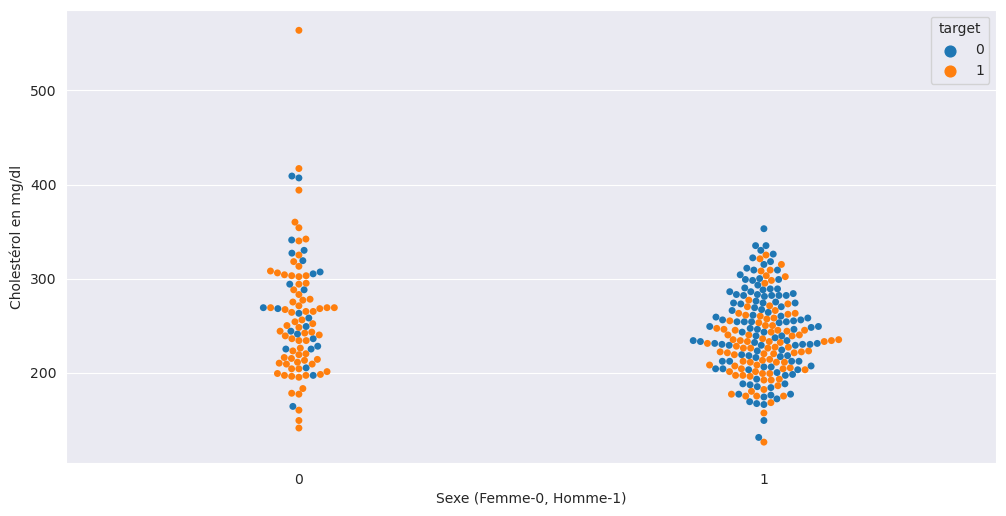

In [23]:
plt.figure(figsize=(12,6), dpi=100)
sns.swarmplot(x='sex', y='chol', data=heart, hue='target')
plt.xlabel('Sexe (Femme-0, Homme-1)')
plt.ylabel('Cholestérol en mg/dl')
plt.show()


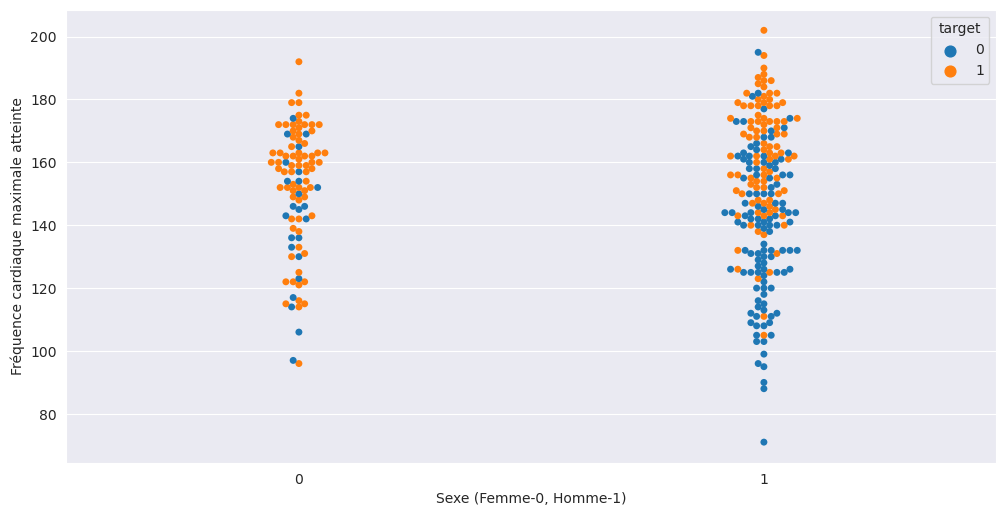

In [24]:
plt.figure(figsize=(12,6), dpi=100)
sns.swarmplot(x='sex', y='thalach', data=heart, hue='target', dodge=False)
plt.xlabel('Sexe (Femme-0, Homme-1)')
plt.ylabel('Fréquence cardiaque maximale atteinte')
plt.show()


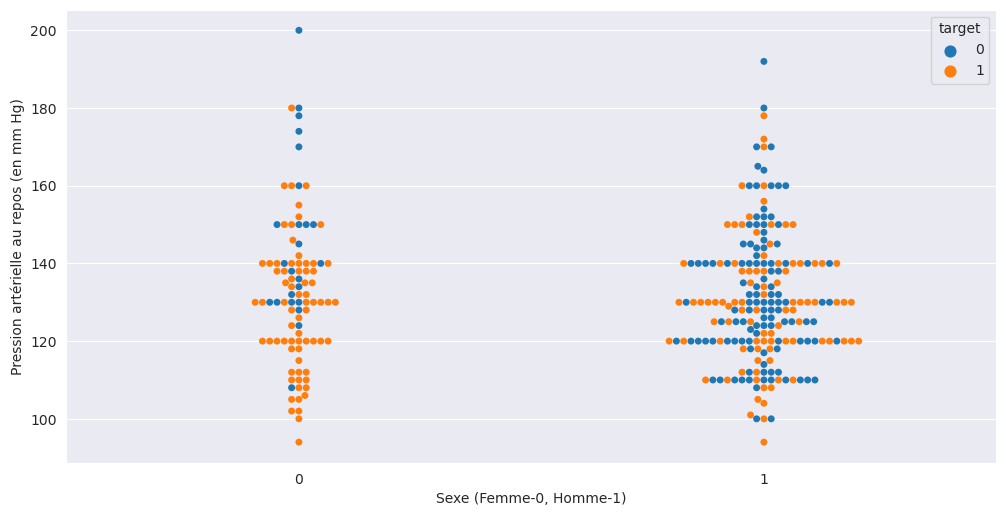

In [25]:
plt.figure(figsize=(12,6), dpi=100)
sns.swarmplot(x='sex', y='trestbps', data=heart, hue='target', dodge=False)
plt.xlabel('Sexe (Femme-0, Homme-1)')
plt.ylabel('Pression artérielle au repos (en mm Hg)')
plt.show()


# **CONSTRUCTION DU MODELE**

**Étant donné qu'il s'agit d'un problème de classification, nous devons choisir un algorithme de classification.**

**Commençons par les arbres de décision, puis nous passerons à la régression logistique et à la forêt aléatoire.**


<h1 style='background:green; border:0; color:white'><center>DECISION TREE</center><h1>

In [26]:
# Diviser les données en fonctionnalités (X) et cible (y)
X = heart.drop('target', axis=1)
y = heart['target']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

# Évaluation du modèle
dt_predictions = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Best Parameters:", dt_best_params)

Decision Tree Accuracy: 0.8524590163934426
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


<Figure size 576x432 with 0 Axes>

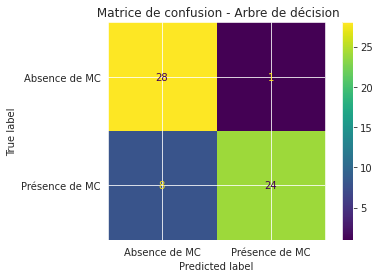

In [27]:
# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
plot_confusion_matrix(dt_best_model, X_test, y_test, display_labels=["Absence de MC", "Présence de MC"])
plt.title(" Matrice de confusion - Arbre de décision")
plt.show()

**Les arbres de décision sont tristement connus pour être surajustés à l'ensemble d'entraînement, donc essayons de tailler cet arbre dans l'espoir d'améliorer la précision avec l'ensemble de test.**

**La taille d'un arbre de décision consiste à trouver la bonne valeur pour le paramètre de taille, alpha, qui contrôle le degré de taille effectué. Une façon de trouver la valeur optimale pour alpha est de tracer la précision de l'arbre en fonction de différentes valeurs pour alpha. Nous ferons cela à la fois pour l'ensemble d'entraînement et pour l'ensemble de test.**


In [28]:
# Taille de coût-complexité
path = dt_best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

# Pruning de l'arbre avec différentes valeurs de ccp_alpha
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

# Évaluation des modèles taillés
dt_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in clf_dts]

# Sélection du meilleur modèle taillé
best_dt_idx = np.argmax(dt_accuracies)
best_dt_alpha = ccp_alphas[best_dt_idx]
best_dt_model = clf_dts[best_dt_idx]

print("\nBest alpha:", best_dt_alpha)
print("Decision Tree Accuracy after pruning:", dt_accuracies[best_dt_idx])


Best alpha: 0.01165114346932529
Decision Tree Accuracy after pruning: 0.8524590163934426


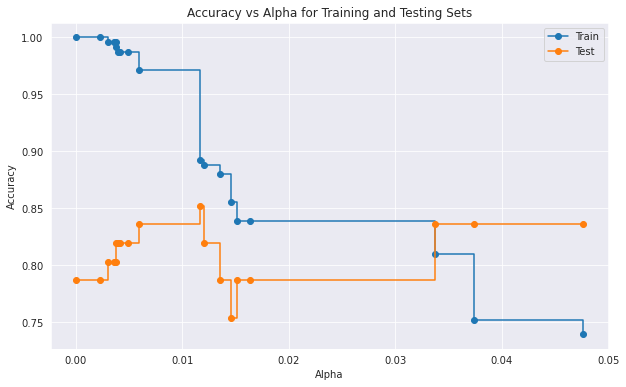

In [29]:
# Calcul des scores d'entraînement et de test pour chaque ccp_alpha
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=best_dt_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

[Text(383.625, 378.5785714285714, 'cp <= 0.5\ngini = 0.495\nsamples = 242\nvalue = [109, 133]\nclass = MC'),
 Text(209.25, 320.3357142857143, 'ca <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [78, 32]\nclass = Pas de MC'),
 Text(139.5, 262.09285714285716, 'exang <= 0.5\ngini = 0.498\nsamples = 53\nvalue = [25, 28]\nclass = MC'),
 Text(69.75, 203.85, 'gini = 0.302\nsamples = 27\nvalue = [5, 22]\nclass = MC'),
 Text(209.25, 203.85, 'oldpeak <= 0.7\ngini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = Pas de MC'),
 Text(139.5, 145.60714285714283, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = MC'),
 Text(279.0, 145.60714285714283, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = Pas de MC'),
 Text(279.0, 262.09285714285716, 'gini = 0.131\nsamples = 57\nvalue = [53, 4]\nclass = Pas de MC'),
 Text(558.0, 320.3357142857143, 'oldpeak <= 1.95\ngini = 0.359\nsamples = 132\nvalue = [31, 101]\nclass = MC'),
 Text(418.5, 262.09285714285716, 'age <= 56.5\ngini = 0.298\nsamples = 121\nvalue

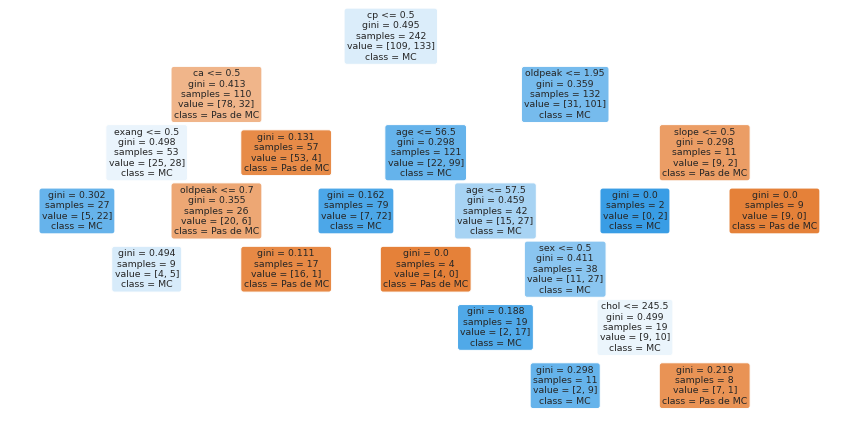

In [31]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["Pas de MC", "MC"], 
          feature_names=X.columns)

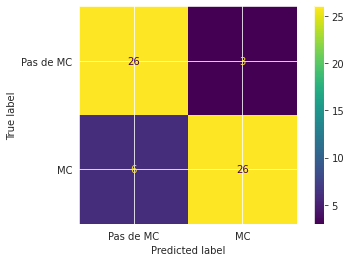

In [32]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Pas de MC", "MC"])

In [33]:
DT_score = clf_dt_pruned.score(X_test, y_test)
print("Decision Tree Accuracy:" , DT_score)

Decision Tree Accuracy: 0.8524590163934426


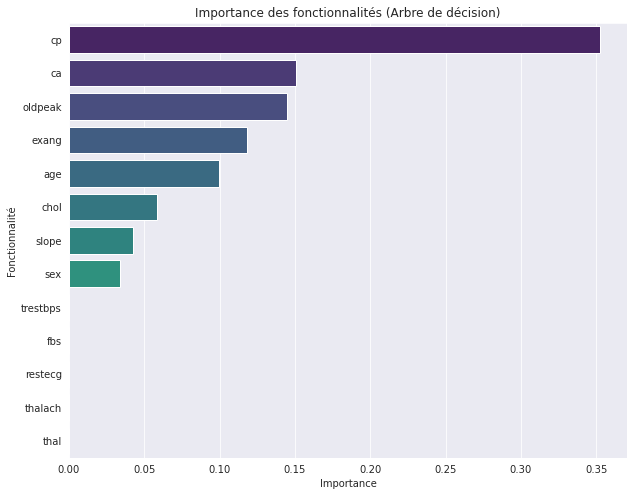

In [34]:
# Obtenir l'importance des fonctionnalités
feature_importance = clf_dt_pruned.feature_importances_

# Créer un DataFrame pour stocker les importances des fonctionnalités
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Trier les fonctionnalités par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Créer le plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Ajouter des titres et des étiquettes
plt.xlabel('Importance')
plt.ylabel('Fonctionnalité')
plt.title('Importance des fonctionnalités (Arbre de décision)')

# Afficher le plot
plt.show()

Dans chaque nœud, nous avons :
- La variable (nom de la colonne) et le seuil pour diviser les observations. Par exemple, dans la racine de l'arbre, nous utilisons **ca** pour diviser les observations.
- **gini** est l'indice Gini ou le score pour ce nœud.
- **samples** nous indique combien d'échantillons sont dans ce nœud.
- **value** nous indique combien d'échantillons dans le nœud sont dans chaque catégorie. Dans cet exemple, nous avons deux catégories, **Non** et **Oui**, se référant à la présence ou non d'une maladie cardiaque chez un patient. Le nombre de patients avec **Non** vient en premier car les catégories sont en ordre alphabétique. Ainsi, dans la racine, 93 patients ont **Non** et 134 patients ont **Oui**.
- **class** nous indique la catégorie la plus représentée dans le nœud.

Les feuilles sont tout comme les nœuds, sauf qu'elles ne contiennent pas de variable et de seuil pour diviser les observations.

Les nœuds et les feuilles sont colorés par la **class**. Dans ce cas, **Non** est de différentes nuances de orange et **Oui** est de différentes nuances de bleu.

Plus la nuance est foncée, plus le **gini** est bas, ce qui nous indique dans quelle mesure le nœud ou la feuille est incliné vers une classe.


<h1 style='background:green; border:0; color:white'><center>LOGISTIC REGRESSION</center><h1>

**La version de la régression logistique dans Scikit-learn prend en charge la régularisation. La régularisation est une technique utilisée pour résoudre le problème de surajustement dans les modèles d'apprentissage automatique.**

**Le paramètre C indique l'inverse de la force de régularisation qui doit être un flottant positif. Les valeurs plus petites spécifient une régularisation plus forte.
Maintenant, ajustons notre modèle avec l'ensemble d'entraînement.**


In [35]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [36]:
LR_score = LR.score(X_test, y_test)
print("Logistic Regression Accuracy:" ,LR_score)

Logistic Regression Accuracy: 0.8688524590163934


In [37]:
ylr = LR.predict(X_test)

## Tentative d'amélioration de la précision avec SMOTE et SelectKBest 

In [38]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# Créer un pipeline avec SMOTE et SelectKBest
pipeline = make_pipeline(
    SMOTE(random_state=42),  # Sur-échantillonnage pour gérer le déséquilibre de classe
    SelectKBest(score_func=chi2, k=10),  # Sélection des 10 meilleures fonctionnalités
    LogisticRegression(C=0.01, solver='liblinear', random_state=42)  # Régression logistique
)

# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Évaluer la précision du modèle
accuracy = pipeline.score(X_test, y_test)
print("Logistic Regression Accuracy with SMOTE and SelectKBest:", accuracy)


Logistic Regression Accuracy with SMOTE and SelectKBest: 0.8360655737704918


**Essayons l'indice de Jaccard pour l'évaluation de l'exactitude. Nous pouvons définir le Jaccard comme la taille de l'intersection divisée par la taille de l'union de deux ensembles d'étiquettes. Si l'ensemble complet des étiquettes prédites pour un échantillon correspond strictement à l'ensemble réel des étiquettes, alors l'exactitude partielle est de 1.0 ; sinon elle est de 0.0.**


In [39]:
jaccard_score(y_test, ylr)

0.7777777777777778

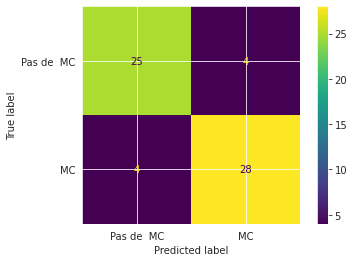

In [40]:
plot_confusion_matrix(LR, 
                      X_test, 
                      y_test, 
                      display_labels=["Pas de  MC", "MC"])

In [41]:
print (classification_report(y_test, ylr))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Basé sur le décompte de chaque section, nous pouvons calculer la précision et le rappel de chaque étiquette :

- **La précision** est une mesure de l'exactitude pour une étiquette de classe prédite. Elle est définie par : précision = TP / (TP + FP)

- **Le rappel** est le taux de vrais positifs. Il est défini par : Rappel = TP / (TP + FN)

Ainsi, nous pouvons calculer la précision et le rappel de chaque classe.

__Score F1 :__
Maintenant, nous sommes en mesure de calculer les scores F1 pour chaque étiquette en fonction de la précision et du rappel de cette étiquette.

**Le score F1 est la moyenne harmonique de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 (précision et rappel parfaits) et sa pire valeur à 0. C'est un bon moyen de montrer qu'un classifieur a une bonne valeur à la fois pour le rappel et la précision.**

Enfin, nous pouvons dire que la précision moyenne pour ce classifieur est la moyenne du score F1 pour les deux étiquettes, qui est de 0,87 dans notre cas.


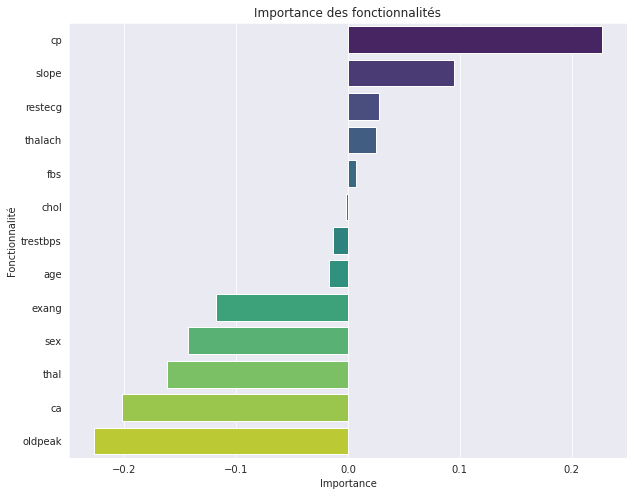

In [42]:
# Obtenir les coefficients attribués à chaque fonctionnalité
feature_importance = LR.coef_[0]

# Créer un DataFrame pour stocker les importances des fonctionnalités
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Trier les fonctionnalités par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Créer le plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Ajouter des titres et des étiquettes
plt.xlabel('Importance')
plt.ylabel('Fonctionnalité')
plt.title('Importance des fonctionnalités')

# Afficher le plot
plt.show()

<h1 style='background:green; border:0; color:white'><center>RANDOM FOREST</center><h1>

**Maintenant, essayons Random Forest et comparons-le avec la régression logistique dans ce cas.**


In [43]:
rfc =  RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [44]:
print("Random Forest Accuracy: ", rfc.score(X_test,y_test))

Random Forest Accuracy:  0.8360655737704918


## Tentative d'amélioration de la précision avec l'optimisation des hyperparamètres

In [45]:

print('Paramètres actuellement utilisés')
print(rfc.get_params())


Paramètres actuellement utilisés
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Nombre d'arbres dans la forêt aléatoire
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Nombre de caractéristiques à considérer à chaque division
max_features = ['auto', 'sqrt']
# Nombre maximum de niveaux dans l'arbre
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Nombre minimum d'échantillons requis pour diviser un nœud
min_samples_split = [2, 5, 10]
# Nombre minimum d'échantillons requis à chaque nœud terminal
min_samples_leaf = [1, 2, 4]
# Méthode de sélection des échantillons pour entraîner chaque arbre
bootstrap = [True, False]
# Créer la grille aléatoire
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
# Utiliser la grille aléatoire pour rechercher les meilleurs hyperparamètres
# Tout d'abord, créer le modèle de base à ajuster
rfc = RandomForestClassifier()
# Recherche aléatoire des paramètres, en utilisant une validation croisée à 3 plis, 
# recherche à travers 100 combinaisons différentes, et utiliser tous les cœurs disponibles
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Ajuster le modèle de recherche aléatoire
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [49]:
rfc_n =  RandomForestClassifier(n_estimators= 1800,min_samples_split = 2,min_samples_leaf = 4,max_depth = 90,bootstrap =True,random_state=42).fit(X_train, y_train)

In [50]:
RF_score = rfc_n.score(X_test,y_test)
print("Random Forest Accuracy: ", RF_score)

Random Forest Accuracy:  0.8688524590163934


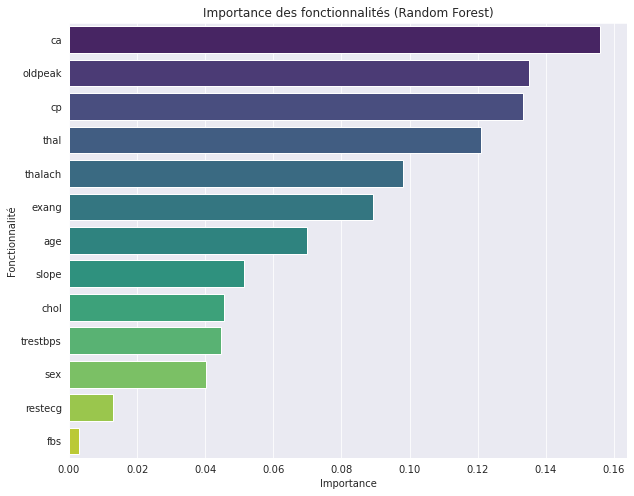

In [51]:
# Obtenir l'importance des fonctionnalités
feature_importance = rfc_n.feature_importances_

# Créer un DataFrame pour stocker les importances des fonctionnalités
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Trier les fonctionnalités par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Créer le plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Ajouter des titres et des étiquettes
plt.xlabel('Importance')
plt.ylabel('Fonctionnalité')
plt.title('Importance des fonctionnalités (Random Forest)')

# Afficher le plot
plt.show()

# **MODEL ACCURACY COMPARISON**

In [52]:
data = [['Decision Tree', DT_score], ['Logistic Regression', LR_score], ['Random Forest', RF_score]] 
accuracy = pd.DataFrame(data,columns = ['Model', 'Accuracy',])
accuracy.head()

,Model,Accuracy
0,Decision Tree,0.852459
1,Logistic Regression,0.868852
2,Random Forest,0.868852


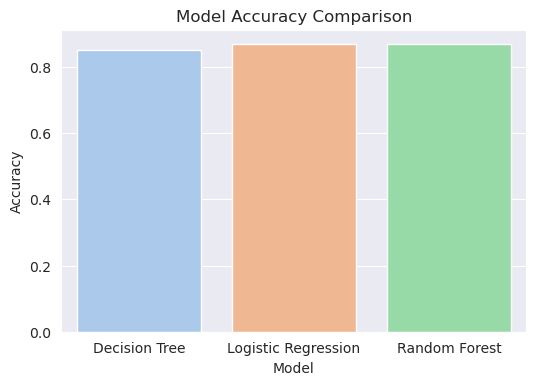

In [53]:
fig = plt.figure(dpi=100)
sns.barplot(x=accuracy['Model'], y=accuracy['Accuracy'], palette='pastel')  # Utilisation d'une palette de couleurs pastel
plt.title('Model Accuracy Comparison')
plt.show()


<h2 style='background:black; border:0; color:white'><center>MERCI !</center><h2>